In [ ]:
install.packages("DescTools")
install.packages("readxl")
install.packages("vcd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(DescTools)
library(readxl)
library(vcd)

# Artigos

https://www.rdocumentation.org/packages/DescTools/versions/0.99.49/topics/Association%20measures

https://rstudio-pubs-static.s3.amazonaws.com/558925_38b86f0530c9480fad4d029a4e4aea68.html


##Telco Churn

In [ ]:
telco <- read.csv("/content/telco.csv")

In [ ]:
head(telco)
str(telco)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

In [ ]:
telco_c <- telco %>% select(gender, Partner, PaymentMethod, Churn)

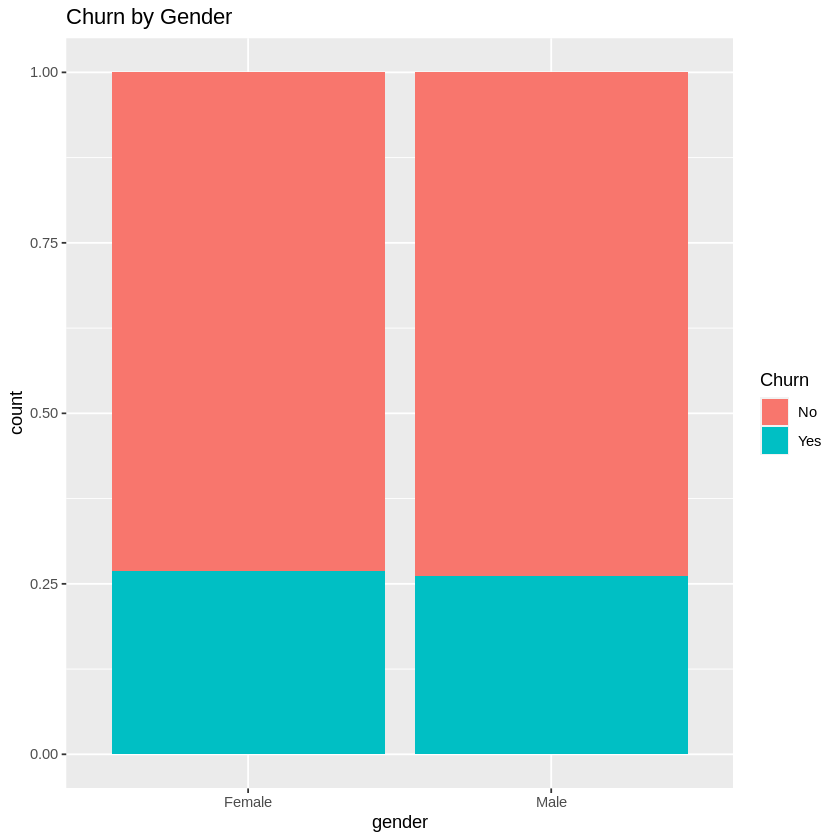

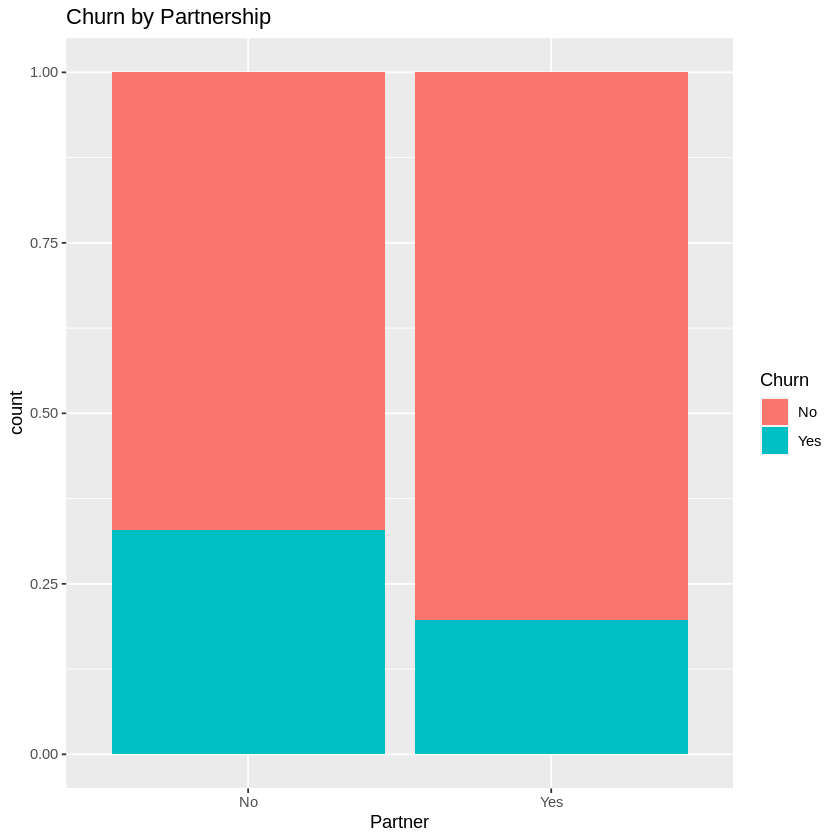

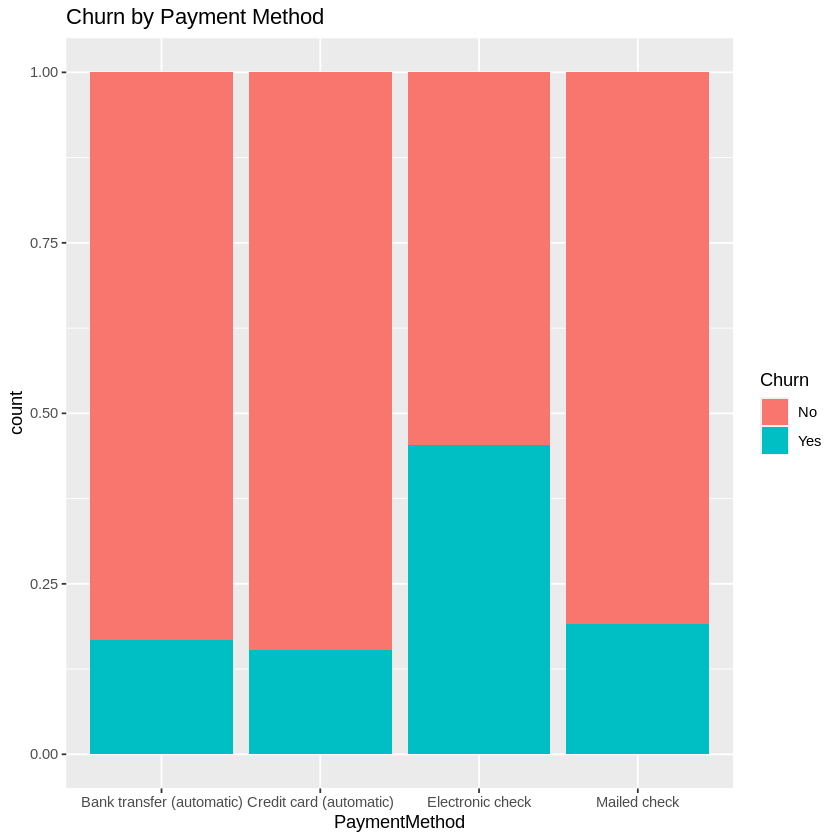

In [ ]:
ggplot(telco_c) +
  aes(x = gender, fill = Churn) +
  geom_bar(position = "fill") +
  scale_fill_hue(direction = 1) +
  ggtitle("Churn by Gender")

ggplot(telco_c) +
  aes(x = Partner, fill = Churn) +
  geom_bar(position = "fill") +
  scale_fill_hue(direction = 1) +
  ggtitle("Churn by Partnership")

ggplot(telco_c) +
  aes(x = PaymentMethod, fill = Churn) +
  geom_bar(position = "fill") +
  scale_fill_hue(direction = 1) +
  ggtitle("Churn by Payment Method")

In [ ]:
# Teste Qui-Quadrado
chisq.test(telco_c$gender, telco_c$Churn)
chisq.test(telco_c$Partner, telco_c$Churn)
chisq.test(telco_c$PaymentMethod, telco_c$Churn)


	Pearson's Chi-squared test with Yates' continuity correction

data:  telco_c$gender and telco_c$Churn
X-squared = 0.48408, df = 1, p-value = 0.4866



	Pearson's Chi-squared test with Yates' continuity correction

data:  telco_c$Partner and telco_c$Churn
X-squared = 158.73, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test

data:  telco_c$PaymentMethod and telco_c$Churn
X-squared = 648.14, df = 3, p-value < 2.2e-16


In [ ]:
# Coeficiente de Contingência
ContCoef(telco_c$gender, telco_c$Churn, correct = FALSE)
ContCoef(telco_c$gender, telco_c$Churn, correct = TRUE)

ContCoef(telco_c$Partner, telco_c$Churn, correct = FALSE)
ContCoef(telco_c$Partner, telco_c$Churn, correct = TRUE)

ContCoef(telco_c$PaymentMethod, telco_c$Churn, correct = FALSE)
ContCoef(telco_c$PaymentMethod, telco_c$Churn, correct = TRUE)

[1] 0.008611776

[1] 0.01217889

[1] 0.1487733

[1] 0.2103972

[1] 0.2902951

[1] 0.4105393

In [ ]:
#V de Cramer
CramerV(telco_c$gender, telco_c$Churn)
CramerV(telco_c$Partner, telco_c$Churn)
CramerV(telco_c$PaymentMethod, telco_c$Churn)

[1] 0.008612095

[1] 0.1504475

[1] 0.3033586

In [ ]:
#T de Tschusprow
TschuprowT(telco_c$gender, telco_c$Churn)
TschuprowT(telco_c$Partner, telco_c$Churn)
TschuprowT(telco_c$PaymentMethod, telco_c$Churn)


[1] 0.008612095

[1] 0.1504475

[1] 0.2305027

In [ ]:
#Uncertainty Coefficient
UncertCoef(telco_c$gender, telco_c$Churn, direction = "column")
UncertCoef(telco_c$Partner, telco_c$Churn, direction = "column")
UncertCoef(telco_c$PaymentMethod, telco_c$Churn, direction = "column")


[1] 6.409087e-05

[1] 0.0197955

[1] 0.07694218